In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir("../MO_project"))
# Any results written in the current directory will be saved as output.

import missingno as msno


['.ipynb_checkpoints', 'all_energy_statistics.csv', 'Energy-Questionnaire-Guidelines.pdf', 'Zaliczenie_01.py', 'Zaliczenie_jupiterv01.ipynb']


In [2]:
# DATA WRANGLINIG

In [3]:
# loading and reading data file for the International Energy Stats

energy = pd.read_csv("all_energy_statistics.csv", parse_dates=True)
energy.head()

country_or_area               commodity_transaction  year  \
0         Austria  Additives and Oxygenates - Exports  1996   
1         Austria  Additives and Oxygenates - Exports  1995   
2         Belgium  Additives and Oxygenates - Exports  2014   
3         Belgium  Additives and Oxygenates - Exports  2013   
4         Belgium  Additives and Oxygenates - Exports  2012   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 NaN   
1  Metric tons,  thousand      17.0                 NaN   
2  Metric tons,  thousand       0.0                 NaN   
3  Metric tons,  thousand       0.0                 NaN   
4  Metric tons,  thousand      35.0                 NaN   

                   category  
0  additives_and_oxygenates  
1  additives_and_oxygenates  
2  additives_and_oxygenates  
3  additives_and_oxygenates  
4  additives_and_oxygenates

In [4]:
# Find more information about the shape, features and unique values
print("Number of rows and columns are:", energy.shape)
print("List of countries and Area are: {}".format(energy.country_or_area.unique()))

Number of rows and columns are: (1189482, 7)
List of countries and Area are: ['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore'
 'Thailand' 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji'
 "Korea, Dem.Ppl's.Rep." 'Russian Federation' 'Swaziland' 'Zimbabwe'
 'Afghanistan' 'A

In [5]:
# Find more about the data from the imported file
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [6]:
# Based on the above data, it seems that there is information missing for the column 'quantity_footnotes'.
# We also need to check if all the names under 'country_or_area' are unique or not.
# We need to check the same thing for other columns such as year, category etc.

#checking for the unique values for 'country_or_area' column
len(energy['country_or_area'].unique())

243

In [7]:
#checking for the unique values for 'year' column
len(energy['year'].unique())

25

In [8]:
#checking for the unique values for 'category' column
len(energy['category'].unique())

71

In [9]:
# Now we are going to focus on finding the missing values
missing = pd.concat([energy.isnull().sum(), 100 * energy.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count', ascending=False)

Count          %
quantity_footnotes     1025536  86.217026
country_or_area              0   0.000000
commodity_transaction        0   0.000000
year                         0   0.000000
unit                         0   0.000000
quantity                     0   0.000000
category                     0   0.000000

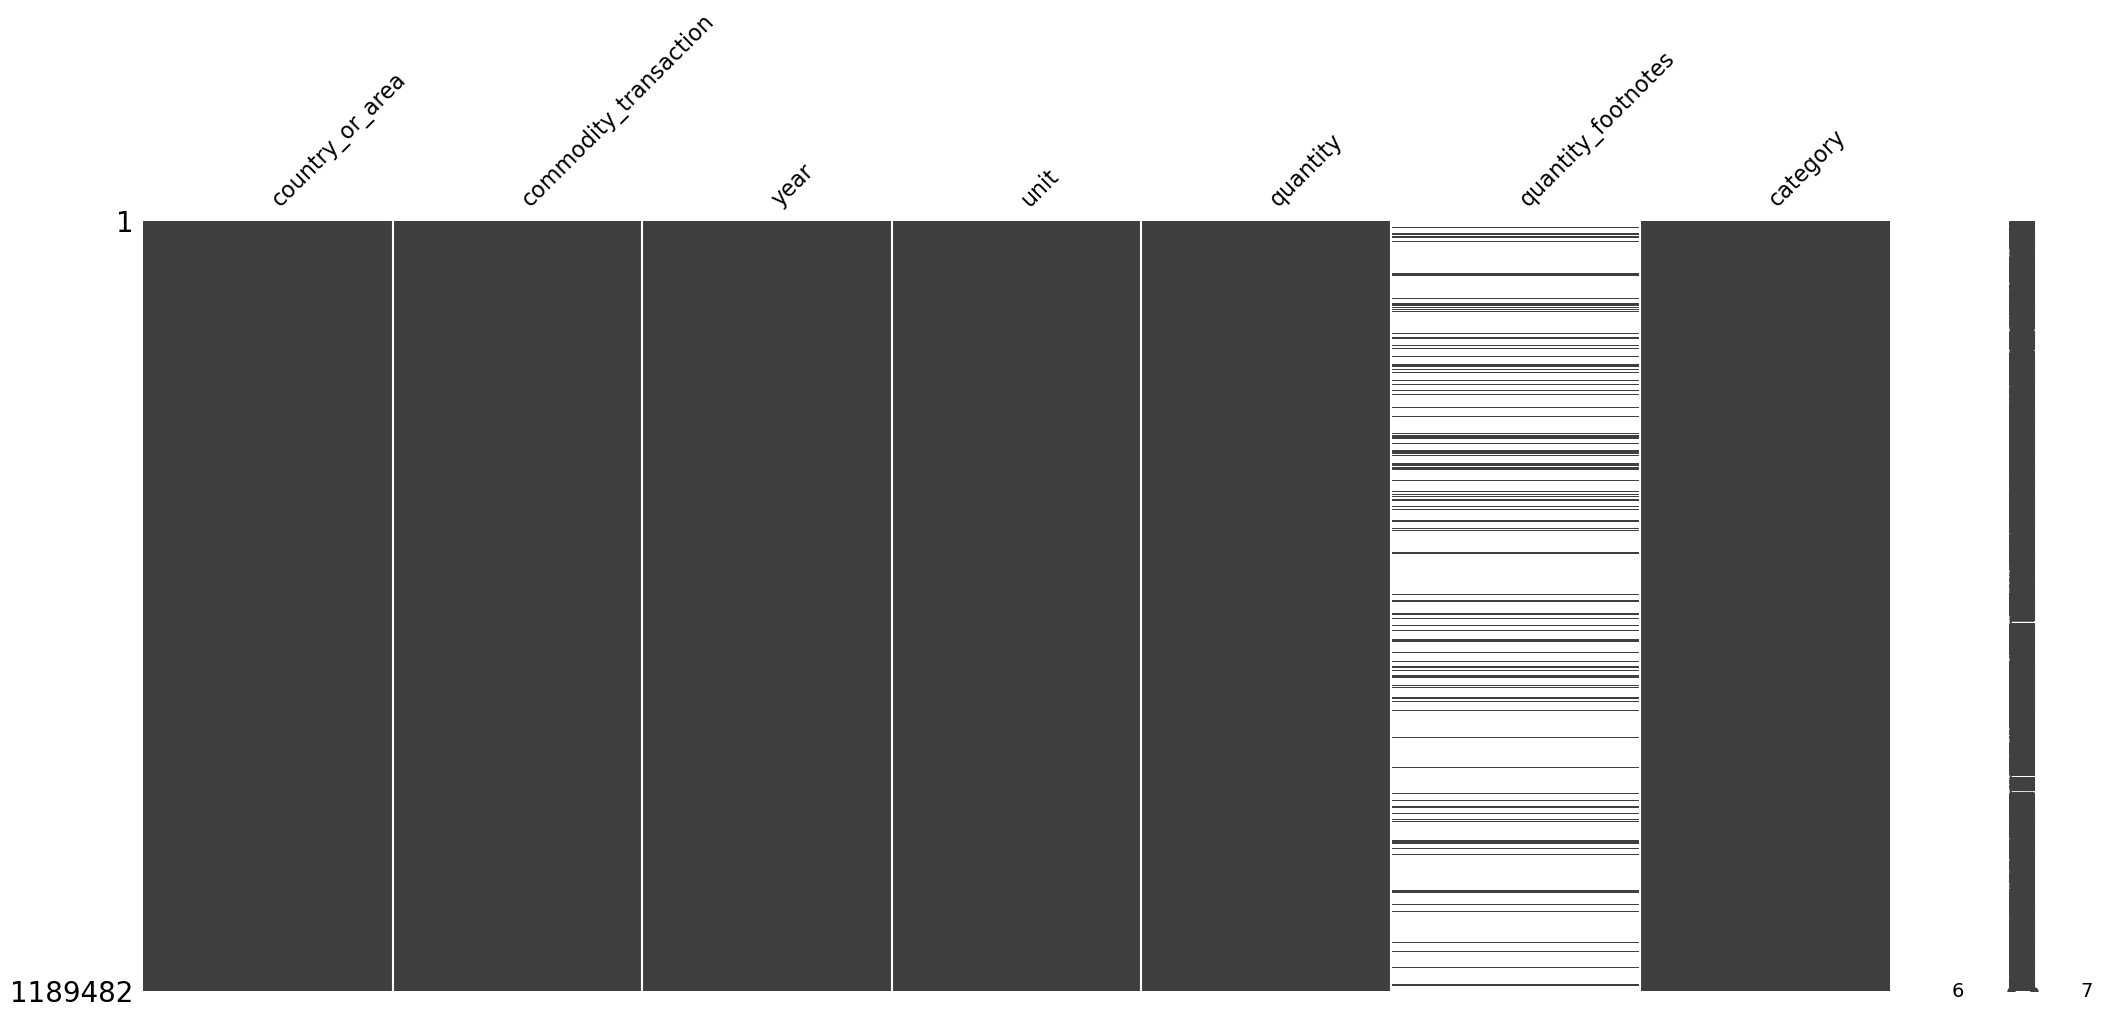

In [10]:
# using missingno package to check for the missingness
msno.matrix(energy)
plt.show()

In [11]:
# checking the quality of footnotes to see if we need those or not
energy['quantity_footnotes'].unique()

array([nan,  1.])

In [12]:
# Since quantity_footnotes is missing lots of value, we are going to drop this column and also it is not adding any value to our analysis
df1 = energy.drop(['quantity_footnotes'], axis=1)
df1.columns

Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'category'],
      dtype='object')

In [13]:
# To avoid any problem on the country_or_area names in the upper and lower, we are going to convert all the names in this & other column to lower case
df1['country_or_area'] = df1['country_or_area'].str.lower()
df1['commodity_transaction'] = df1['commodity_transaction'].str.lower()
df1['unit'] = df1['unit'].str.lower()
df1['category'] = df1['category'].str.lower()
df1.head()

country_or_area               commodity_transaction  year  \
0         austria  additives and oxygenates - exports  1996   
1         austria  additives and oxygenates - exports  1995   
2         belgium  additives and oxygenates - exports  2014   
3         belgium  additives and oxygenates - exports  2013   
4         belgium  additives and oxygenates - exports  2012   

                     unit  quantity                  category  
0  metric tons,  thousand       5.0  additives_and_oxygenates  
1  metric tons,  thousand      17.0  additives_and_oxygenates  
2  metric tons,  thousand       0.0  additives_and_oxygenates  
3  metric tons,  thousand       0.0  additives_and_oxygenates  
4  metric tons,  thousand      35.0  additives_and_oxygenates

In [14]:
# Simplifying the column names by renaming it
df1.columns = ['country', 'commodity', 'year', 'unit', 'quantity', 'category']
df1.head()

country                           commodity  year                    unit  \
0  austria  additives and oxygenates - exports  1996  metric tons,  thousand   
1  austria  additives and oxygenates - exports  1995  metric tons,  thousand   
2  belgium  additives and oxygenates - exports  2014  metric tons,  thousand   
3  belgium  additives and oxygenates - exports  2013  metric tons,  thousand   
4  belgium  additives and oxygenates - exports  2012  metric tons,  thousand   

   quantity                  category  
0       5.0  additives_and_oxygenates  
1      17.0  additives_and_oxygenates  
2       0.0  additives_and_oxygenates  
3       0.0  additives_and_oxygenates  
4      35.0  additives_and_oxygenates

In [15]:
# finding the unique years for the data (to check if that data is from 1990 to 2014)
df1['year'].unique()

array([1996, 1995, 2014, 2013, 2012, 2011, 2010, 2009, 1998, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1997, 1994, 1993,
       1992, 1991, 1990], dtype=int64)

In [16]:
# exploring more about the category
df1['category'].unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

In [17]:
# exploring more about the commodity
df1['commodity'].unique()

array(['additives and oxygenates - exports',
       'additives and oxygenates - imports',
       'additives and oxygenates - production', ...,
       'white spirit and special boiling point industrial spirits - transformation',
       'white spirit and special boiling point industrial spirits - transformation in petrochemical plants',
       'electricity - total wind production'], dtype=object)

In [18]:
# Since we are going to focus on the G7 (and Poland) countries, so we are going to create a function to select a country.
def select_country(countryname):
    country_data = df1[df1.country.isin(countryname)].sort_values('year').reset_index()
    country_data.drop('index', axis=1, inplace=True)
    return country_data

In [19]:
# Generating data for each country

us_data = select_country(['united states'])
canada_data = select_country(['canada'])
germany_data = select_country(['germany'])
france_data = select_country(['france'])
italy_data = select_country(['italy'])
japan_data = select_country(['japan'])
uk_data = select_country(['united kingdom'])
poland_data = select_country(['poland'])

In [20]:
# now selecting the category by creating a function
def select_category(country_data, categoryname):
    category_country = country_data[country_data.category.isin(categoryname)].sort_values('year').reset_index()
    category_country.drop('index', axis=1, inplace=True)
    return category_country

In [21]:
# EXPLORATORY DATA ANALYSIS AND INSIGHTS

In [22]:
# Generating category for each country for the conventional crude oil
crude_us = select_category(us_data, ['conventional_crude_oil'])
crude_canada = select_category(canada_data, ['conventional_crude_oil'])
crude_germany = select_category(germany_data, ['conventional_crude_oil'])
crude_france = select_category(france_data, ['conventional_crude_oil'])
crude_italy = select_category(italy_data, ['conventional_crude_oil'])
crude_japan = select_category(japan_data, ['conventional_crude_oil'])
crude_uk = select_category(uk_data, ['conventional_crude_oil'])
crude_poland = select_category(poland_data, ['conventional_crude_oil'])

In [23]:
# Filtering further for the commodity type
def select_commodity(category_country, commodityname):
    commodity_country = category_country[category_country.commodity.isin(commodityname)].sort_values('year').reset_index()
    commodity_country.drop('index', axis=1, inplace=True )
    return commodity_country

In [24]:
# Filtering data for the conventional crude oil production for the G7 (+Poland) countries

crudeprod_us = select_commodity(crude_us,['conventional crude oil - production'])
crudeprod_canada = select_commodity(crude_canada,['conventional crude oil - production'])
crudeprod_germany = select_commodity(crude_germany,['conventional crude oil - production'])
crudeprod_france = select_commodity(crude_france,['conventional crude oil - production'])
crudeprod_italy = select_commodity(crude_italy,['conventional crude oil - production'])
crudeprod_japan = select_commodity(crude_japan,['conventional crude oil - production'])
crudeprod_uk = select_commodity(crude_uk,['conventional crude oil - production'])
crudeprod_poland = select_commodity(crude_poland,['conventional crude oil - production'])

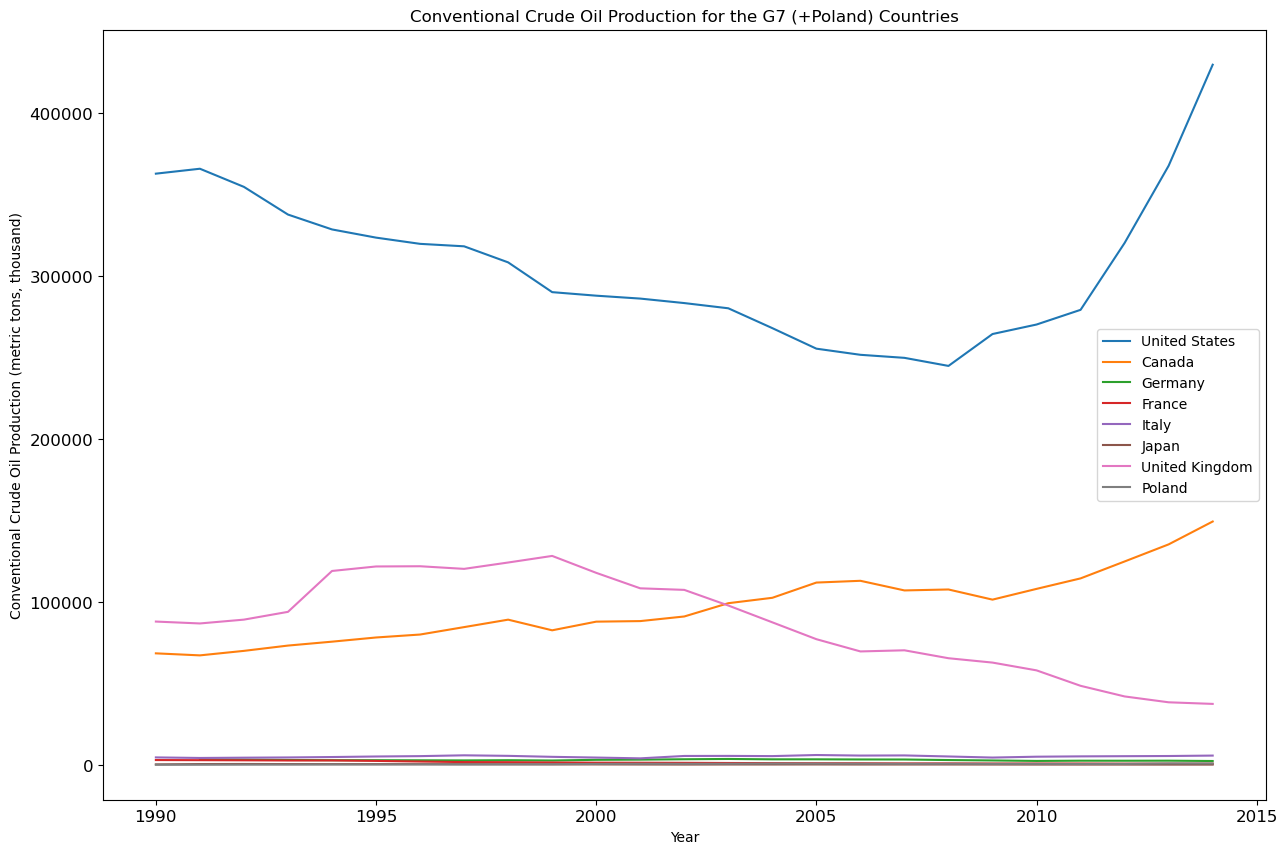

In [25]:
# plotting line graph for each G7 (+Poland) country for the Conventional Crude Production

plt.figure(figsize=(15, 10))
x1 = crudeprod_us.year
y1 = crudeprod_us.quantity
plt.plot(x1, y1, label='United States')
x2 = crudeprod_canada.year
y2 = crudeprod_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = crudeprod_germany.year
y3 = crudeprod_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = crudeprod_france.year
y4 = crudeprod_france.quantity
plt.plot(x4, y4, label='France')
x5 = crudeprod_italy.year
y5 = crudeprod_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = crudeprod_japan.year
y6 = crudeprod_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = crudeprod_uk.year
y7 = crudeprod_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
x8 = crudeprod_poland.year
y8 = crudeprod_poland.quantity
plt.plot(x8, y8, label='Poland')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Conventional Crude Oil Production (metric tons, thousand)")
plt.title("Conventional Crude Oil Production for the G7 (+Poland) Countries")
plt.legend(loc='best')
plt.show()

In [26]:
# There are 3 main countries with the conventional crude oil production among the G7 countries: United States, Canada and United Kingdom. 
# While production is going up in the US and Canada, it is coming down in the UK.

In [27]:
# Analysis for Conventional Crude Oil Production for G7 (+Poland) Countries

In [28]:
# Filtering data for the conventional crude oil Imports for the G7 (+Poland)countries

crudeimp_us = select_commodity(crude_us,['conventional crude oil - imports'])
crudeimp_canada = select_commodity(crude_canada,['conventional crude oil - imports'])
crudeimp_germany = select_commodity(crude_germany,['conventional crude oil - imports'])
crudeimp_france = select_commodity(crude_france,['conventional crude oil - imports'])
crudeimp_italy = select_commodity(crude_italy,['conventional crude oil - imports'])
crudeimp_japan = select_commodity(crude_japan,['conventional crude oil - imports'])
crudeimp_uk = select_commodity(crude_uk,['conventional crude oil - imports'])
crudeimp_poland = select_commodity(crude_poland,['conventional crude oil - imports'])

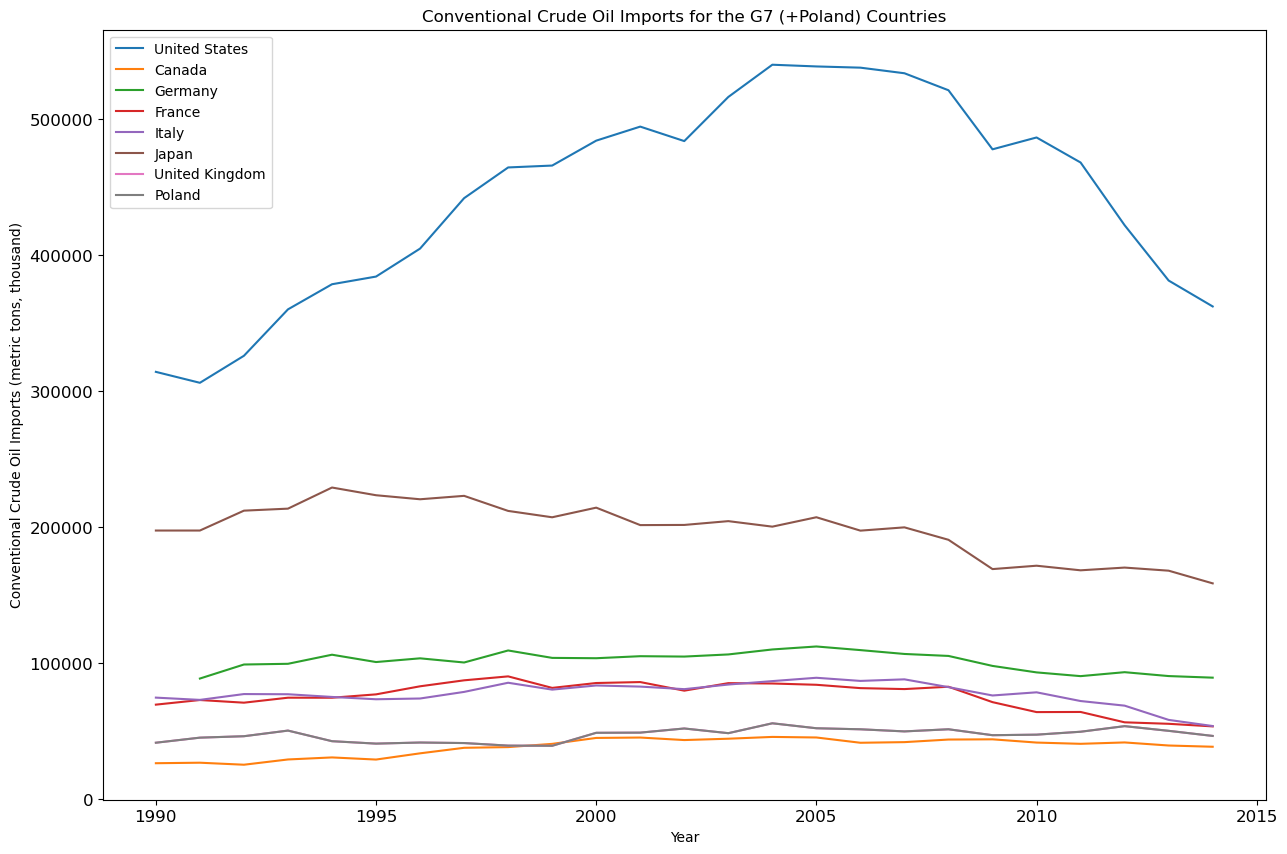

In [29]:
# plotting line graph for each G7 (+Poland) country for the Conventional Crude Imports

plt.figure(figsize=(15, 10))
x1 = crudeimp_us.year
y1 = crudeimp_us.quantity
plt.plot(x1, y1, label='United States')
x2 = crudeimp_canada.year
y2 = crudeimp_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = crudeimp_germany.year
y3 = crudeimp_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = crudeimp_france.year
y4 = crudeimp_france.quantity
plt.plot(x4, y4, label='France')
x5 = crudeimp_italy.year
y5 = crudeimp_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = crudeimp_japan.year
y6 = crudeimp_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = crudeimp_uk.year
y7 = crudeimp_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
x8 = crudeimp_poland.year
y8 = crudeimp_poland.quantity
plt.plot(x7, y7, label='Poland')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Conventional Crude Oil Imports (metric tons, thousand)")
plt.title("Conventional Crude Oil Imports for the G7 (+Poland) Countries")
plt.legend(loc='best')
plt.show()

In [30]:
# Facts about the Crude Oil imports for various G7 countries and Poland such as following:

# - Since the demand for the crude oil is high for the US due to so many refineries and huge domestic consumption, 
# import curve shows increase while production is decresing and imports decreasing while production is increasing.
# - Since Canada produces enough for its domestic market, it shows Canadian imports the lowest and consistent.
# - Most of the European countries depend on the imports.
# - Poland have higher import demands than Canada

In [31]:
# Analysis for Solar Electricity for the G7 (+Poland) Countries

In [32]:
# Generating category for each country for the Solar Electricity

solar_us = select_category(us_data, ['solar_electricity'])
solar_canada = select_category(canada_data, ['solar_electricity'])
solar_germany = select_category(germany_data, ['solar_electricity'])
solar_france = select_category(france_data, ['solar_electricity'])
solar_italy = select_category(italy_data, ['solar_electricity'])
solar_japan = select_category(japan_data, ['solar_electricity'])
solar_uk = select_category(uk_data, ['solar_electricity'])
solar_poland = select_category(poland_data, ['solar_electricity'])

In [33]:
# Filtering data for the Solar Electricity Production for the G7 (+Poland) countries

solarcap_us = select_commodity(solar_us,['electricity - total solar production'])
solarcap_canada = select_commodity(solar_canada,['electricity - total solar production'])
solarcap_germany = select_commodity(solar_germany,['electricity - total solar production'])
solarcap_france = select_commodity(solar_france,['electricity - total solar production'])
solarcap_italy = select_commodity(solar_italy,['electricity - total solar production'])
solarcap_japan = select_commodity(solar_japan,['electricity - total solar production'])
solarcap_uk = select_commodity(solar_uk,['electricity - total solar production'])
solarcap_poland = select_commodity(solar_poland,['electricity - total solar production'])

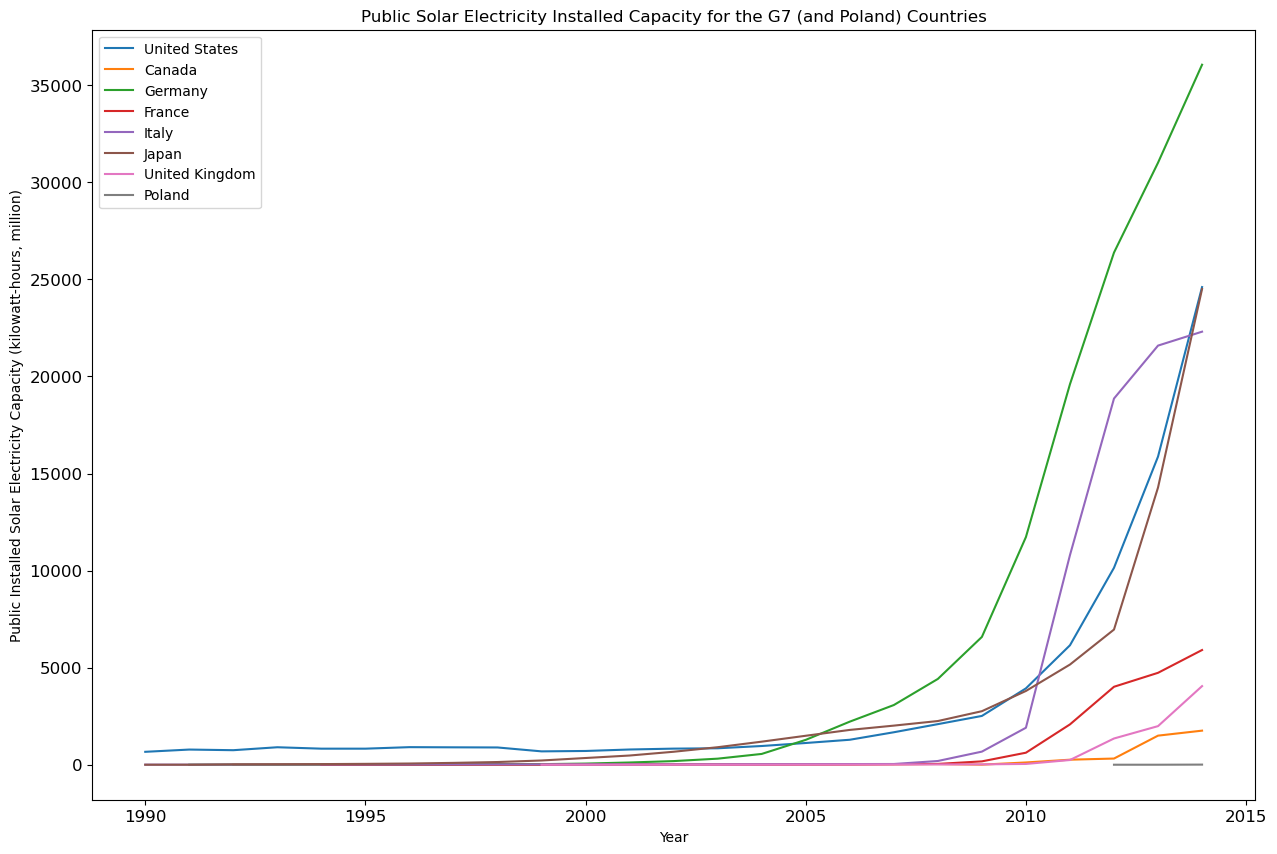

In [34]:
# plotting line graph for each G7 (+Poland) country for the Installed Public Solar Electricity Capacity

plt.figure(figsize=(15, 10))
x1 = solarcap_us.year
y1 = solarcap_us.quantity
plt.plot(x1, y1, label='United States')
x2 = solarcap_canada.year
y2 = solarcap_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = solarcap_germany.year
y3 = solarcap_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = solarcap_france.year
y4 = solarcap_france.quantity
plt.plot(x4, y4, label='France')
x5 = solarcap_italy.year
y5 = solarcap_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = solarcap_japan.year
y6 = solarcap_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = solarcap_uk.year
y7 = solarcap_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
x8 = solarcap_poland.year
y8 = solarcap_poland.quantity
plt.plot(x8, y8, label='Poland')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Public Installed Solar Electricity Capacity (kilowatt-hours, million)")
plt.title("Public Solar Electricity Installed Capacity for the G7 (and Poland) Countries")
plt.legend(loc='best')
plt.show()

In [35]:
# Germany is a leader in the solar electricity production with the US, Japan and Italy following it.
# Poland doesn't exist in solar electricity production (in year 2014).

In [36]:
# Analysis for Wind Electricity for the G7 (+Poland) Countries

In [37]:
# Generating category for each country for the Wind Electricity

wind_us = select_category(us_data, ['wind_electricity'])
wind_canada = select_category(canada_data, ['wind_electricity'])
wind_germany = select_category(germany_data, ['wind_electricity'])
wind_france = select_category(france_data, ['wind_electricity'])
wind_italy = select_category(italy_data, ['wind_electricity'])
wind_japan = select_category(japan_data, ['wind_electricity'])
wind_uk = select_category(uk_data, ['wind_electricity'])
wind_poland = select_category(poland_data, ['wind_electricity'])

In [38]:
# Filtering data for the Wind Electricity Production for the G7 (+Poland) countries

windcap_us = select_commodity(wind_us,['electricity - total wind production'])
windcap_canada = select_commodity(wind_canada,['electricity - total wind production'])
windcap_germany = select_commodity(wind_germany,['electricity - total wind production'])
windcap_france = select_commodity(wind_france,['electricity - total wind production'])
windcap_italy = select_commodity(wind_italy,['electricity - total wind production'])
windcap_japan = select_commodity(wind_japan,['electricity - total wind production'])
windcap_uk = select_commodity(wind_uk,['electricity - total wind production'])
windcap_poland = select_commodity(wind_poland,['electricity - total wind production'])

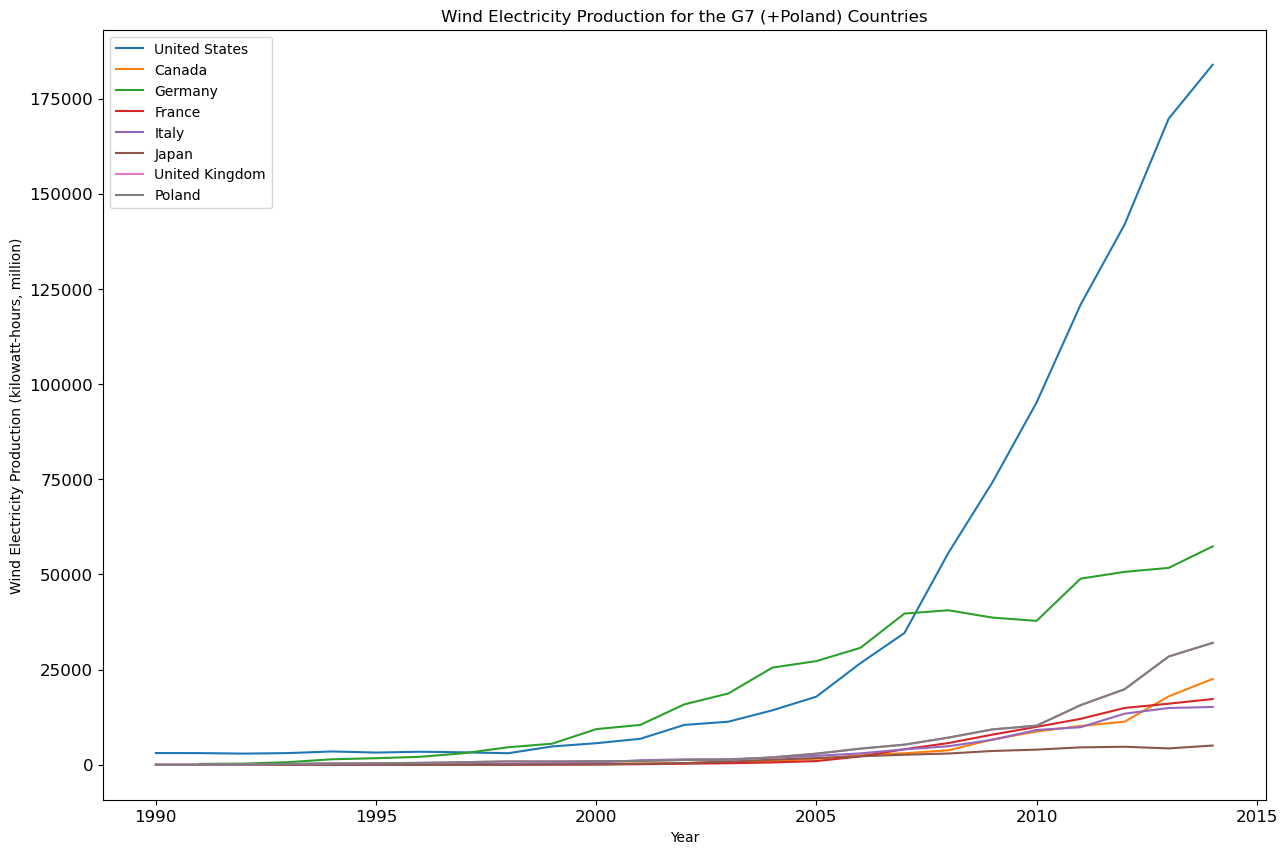

In [39]:
# plotting line graph for each G7 (+Poland) country for the Wind Electricity Production

plt.figure(figsize=(15, 10))
x1 = windcap_us.year
y1 = windcap_us.quantity
plt.plot(x1, y1, label='United States')
x2 = windcap_canada.year
y2 = windcap_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = windcap_germany.year
y3 = windcap_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = windcap_france.year
y4 = windcap_france.quantity
plt.plot(x4, y4, label='France')
x5 = windcap_italy.year
y5 = windcap_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = windcap_japan.year
y6 = windcap_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = windcap_uk.year
y7 = windcap_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
x8 = windcap_poland.year
y8 = windcap_poland.quantity
plt.plot(x7, y7, label='Poland')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Wind Electricity Production (kilowatt-hours, million)")
plt.title("Wind Electricity Production for the G7 (+Poland) Countries")
plt.legend(loc='best')
plt.show()

In [40]:
# Additional analysis

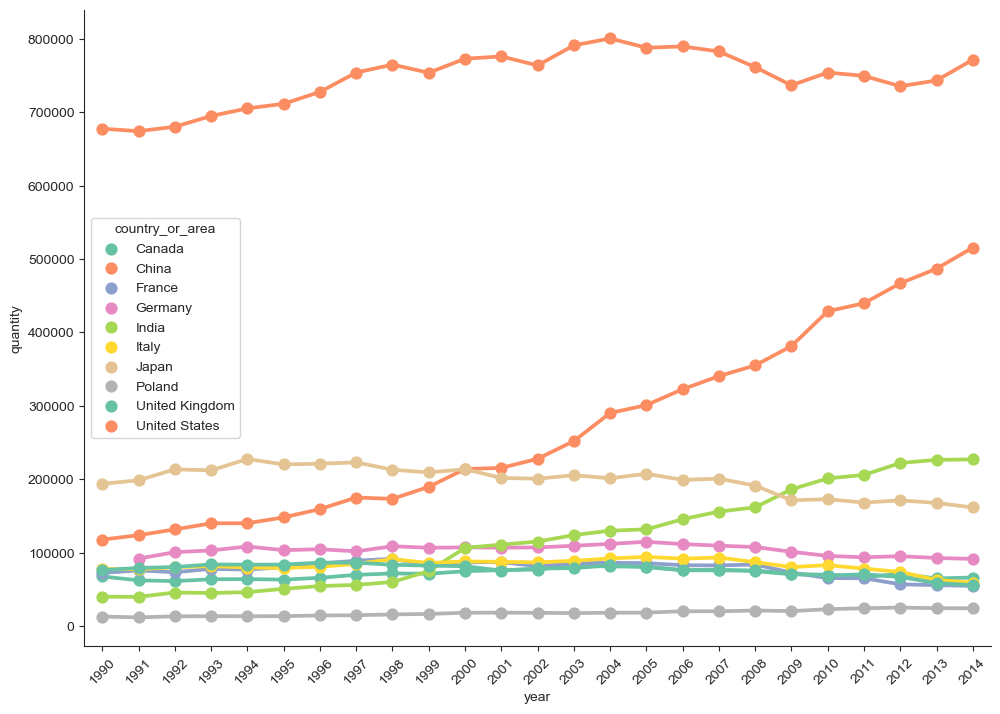

In [41]:
# Crude oil energy supply and added India and China as a growing stars
# plot
labels = list(range(1990,2015))
countries = ['United States', 'United Kingdom', 'Germany', 'Japan', 'India', 'China',
             'Italy', 'France', 'Canada', 'Poland']

crude_oil_supply = energy[energy['commodity_transaction'].isin(['Conventional crude oil - total energy supply'])]
crude_oil_supply = crude_oil_supply[crude_oil_supply['country_or_area'].isin(countries)]


sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.pointplot(x='year', y='quantity', hue='country_or_area', data=crude_oil_supply, ax=ax, palette='Set2')
ax.set_xticklabels(labels=labels, rotation=45)
sns.despine()

In [42]:
# LINEAR REGRESSION

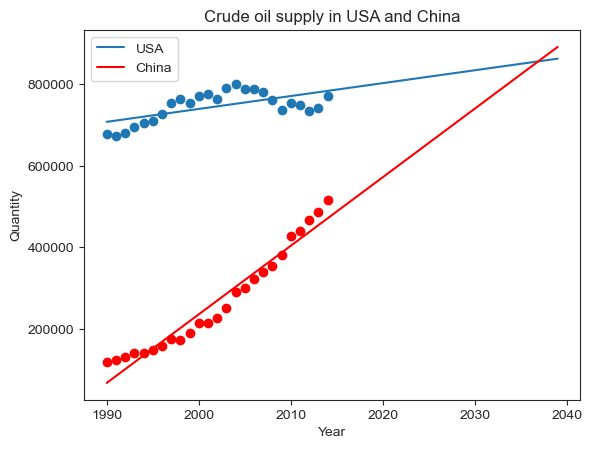

In [43]:
# Linear regression lines on China and USA and predict when the USA's energy supply will be overtaken

# Import missing library

from sklearn.linear_model import LinearRegression

# USA's data
US_oil_supply = crude_oil_supply[crude_oil_supply['country_or_area'].isin(['United States'])]
X_US = US_oil_supply['year'].values.reshape(-1, 1)
y_US = US_oil_supply['quantity'].values.reshape(-1, 1)
# USA linear model
us_regressor = LinearRegression()
us_regressor.fit(X_US, y_US)

# China's data
CN_oil_supply = crude_oil_supply[crude_oil_supply['country_or_area'].isin(['China'])]
X_CN = CN_oil_supply['year'].values.reshape(-1, 1)
y_CN = CN_oil_supply['quantity'].values.reshape(-1, 1)
# China linear model
cn_regressor = LinearRegression()
cn_regressor.fit(X_CN, y_CN)

# Forecasting
forecast_years = np.array(list(range(1990, 2040))).reshape(-1, 1)

# Plotting
plt.scatter(US_oil_supply['year'], US_oil_supply['quantity'])
plt.plot(forecast_years, us_regressor.predict(forecast_years), label='USA')
plt.scatter(CN_oil_supply['year'], CN_oil_supply['quantity'], color='r')
plt.plot(forecast_years, cn_regressor.predict(forecast_years), color='r', label='China')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Crude oil supply in USA and China')
plt.legend(loc='best')
plt.show()

In [44]:
# OPTUNA

In [45]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  # Have to change on Ridge becouse LinearRegression doesn't work for this set of data
from sklearn.metrics import mean_squared_error

# Choosing proper cathegories
convexp_us = select_commodity(us_data, ['conventional crude oil - exports'])
convimp_us = select_commodity(us_data, ['conventional crude oil - imports'])

# Preapering data
features = convexp_us[['year', 'quantity']]
target = convimp_us['quantity']

# Choosing if data are available or not
if features.empty or target.empty:
    print("There are no data in one of the datasets. Check if data are properly imported.")
else:
    # Split dataset on two parts: training set and validation set
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

    def objective(trial):
        # Hiperparameters definitions
        alpha = trial.suggest_float('alpha', 0.01, 1.0)

        # Ridge model initiation with Regularization L2
        # Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.
        model = Ridge(alpha=alpha)  

        # Model training
        model.fit(X_train, y_train)

        # Predicion based on validation dataset
        y_pred = model.predict(X_val)

        # Mean Squared Error
        mse = mean_squared_error(y_val, y_pred)

        return mse

    # Optuna study optimization
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    # Show the best results for hiperparameters
    print("Best hiperparameters:")
    print(study.best_params)
    print("Metric value for best hiperparameters:")
    print(study.best_value)

[I 2024-05-14 19:32:16,789] A new study created in memory with name: no-name-4191da8a-d99a-4418-b964-daa8dd78d079
[I 2024-05-14 19:32:16,809] Trial 0 finished with value: 5187916166.097662 and parameters: {'alpha': 0.9762610324996205}. Best is trial 0 with value: 5187916166.097662.
[I 2024-05-14 19:32:16,828] Trial 1 finished with value: 5189051759.71256 and parameters: {'alpha': 0.4021789405956477}. Best is trial 0 with value: 5187916166.097662.
[I 2024-05-14 19:32:16,851] Trial 2 finished with value: 5189108852.179633 and parameters: {'alpha': 0.3733774446207402}. Best is trial 0 with value: 5187916166.097662.
[I 2024-05-14 19:32:16,862] Trial 3 finished with value: 5188583328.4371395 and parameters: {'alpha': 0.6387081489237015}. Best is trial 0 with value: 5187916166.097662.
[I 2024-05-14 19:32:16,874] Trial 4 finished with value: 5188357085.463762 and parameters: {'alpha': 0.7530872499221491}. Best is trial 0 with value: 5187916166.097662.
[I 2024-05-14 19:32:16,889] Trial 5 finis

Best hiperparameters:
{'alpha': 0.9997473935722192}
Metric value for best hiperparameters:
5187869804.62871


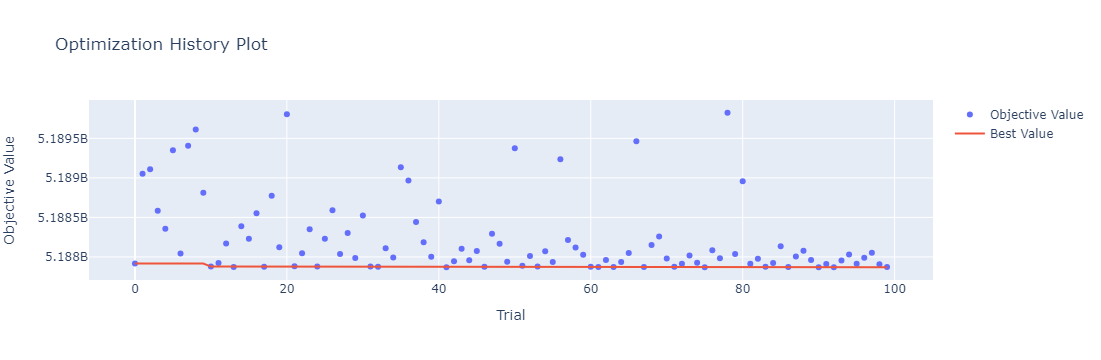

In [46]:
optuna.visualization.plot_optimization_history(study)

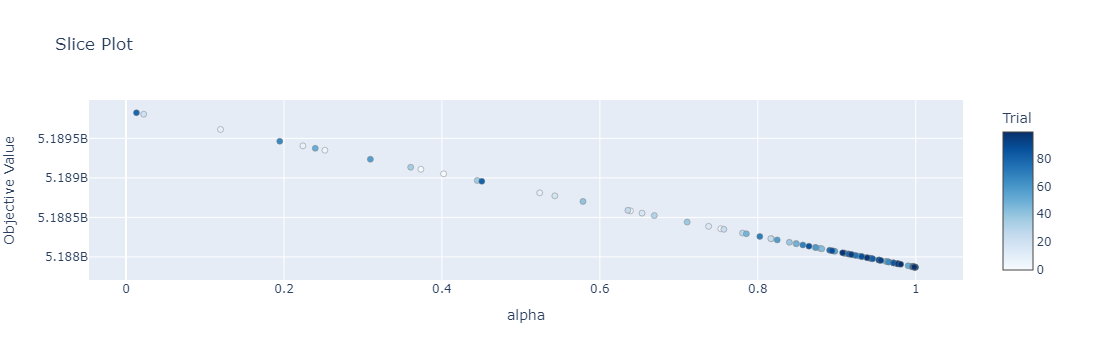

In [47]:
optuna.visualization.plot_slice(study)

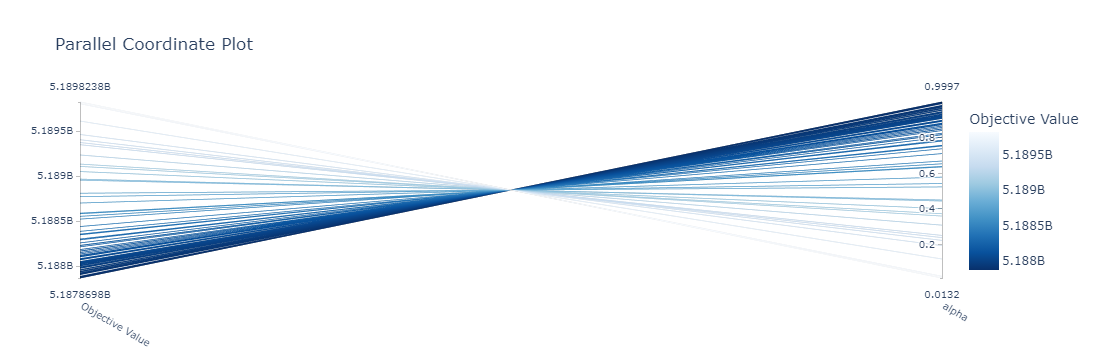

In [48]:
optuna.visualization.plot_parallel_coordinate(study)

In [49]:
# Shapley values

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import shap

# Read the dataset
dataset = pd.read_csv("all_energy_statistics.csv", parse_dates=True)

# Selecting features (X) and target variable (Y)
X = dataset[['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity', 'quantity_footnotes']]
Y = dataset['category']

# Encode the target variable Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# One-hot encode categorical columns in X
X_encoded = pd.get_dummies(X)

# Splitting the dataset into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=test_size, random_state=seed)

# Creating and fitting the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Explaining model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizing SHAP summary plot
shap.summary_plot(shap_values, X_test)


MemoryError: Unable to allocate 16.1 GiB for an array with shape (2704, 796952) and data type object